<a href="https://colab.research.google.com/github/muhammadalfateh6/Muhammad_Alfateh_Work/blob/main/Reducing_Overfitting_Regularization_Dropout_callbacks.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import tensorflow as tf
import pandas as pd
from tensorflow.keras.layers import Dropout, Dense, BatchNormalization
from tensorflow.keras import regularizers
from tensorflow.keras.models import Sequential
from tensorflow.keras.callbacks import Callback
from tensorflow.keras.callbacks import EarlyStopping

In [ ]:
tf.__version__

'2.9.2'

In [ ]:
from sklearn.datasets import load_diabetes
dataset = load_diabetes()
print(dataset["DESCR"])

.. _diabetes_dataset:

Diabetes dataset
----------------

Ten baseline variables, age, sex, body mass index, average blood
pressure, and six blood serum measurements were obtained for each of n =
442 diabetes patients, as well as the response of interest, a
quantitative measure of disease progression one year after baseline.

**Data Set Characteristics:**

  :Number of Instances: 442

  :Number of Attributes: First 10 columns are numeric predictive values

  :Target: Column 11 is a quantitative measure of disease progression one year after baseline

  :Attribute Information:
      - age     age in years
      - sex
      - bmi     body mass index
      - bp      average blood pressure
      - s1      tc, total serum cholesterol
      - s2      ldl, low-density lipoproteins
      - s3      hdl, high-density lipoproteins
      - s4      tch, total cholesterol / HDL
      - s5      ltg, possibly log of serum triglycerides level
      - s6      glu, blood sugar level

Note: Each of these 1

In [ ]:
print(dataset.keys())

dict_keys(['data', 'target', 'frame', 'DESCR', 'feature_names', 'data_filename', 'target_filename', 'data_module'])


In [ ]:
data = dataset["data"]
target = dataset["target"]
target = (target - target.mean(axis=0)) / target.std()

In [ ]:
from sklearn.model_selection import train_test_split
train_data, test_data, train_target, test_target = train_test_split(data, target, test_size=0.1)
print(train_data.shape)
print(test_data.shape)
print(test_target.shape)

(397, 10)
(45, 10)
(45,)


In [ ]:
def get_model_regular(rr, rate):
  model = Sequential ([
      Dense(128,kernel_regularizer =regularizers.l2(rr), activation ='relu', input_shape =(train_data.shape[1],)),
      BatchNormalization(),
      Dropout(rate),
      Dense(128,kernel_regularizer =regularizers.l2(rr), activation ='relu'),
      BatchNormalization(),
      Dropout(rate),
      Dense(128,kernel_regularizer =regularizers.l2(rr), activation ='relu'),
      BatchNormalization(),
      Dropout(rate),
      Dense(128,kernel_regularizer =regularizers.l2(rr), activation ='relu'),
      BatchNormalization(),
      Dropout(rate),
      Dense(128,kernel_regularizer =regularizers.l2(rr), activation ='relu'),
      BatchNormalization(),
      Dropout(rate),
      Dense(128,kernel_regularizer =regularizers.l2(rr), activation ='relu'),
      BatchNormalization(),
      Dropout(rate),
      Dense(1)
  ])
  return model


In [ ]:
class Trainingcallback(Callback):

  def on_train_begin(self, logs=None):
    print("starting training....!!!!")
  def on_epoch_begin(self, epoch, logs=None):
    print(f"starting epoch  {epoch}")
  def on_train_batch_begin(self, batch, logs=None):
    print(f"Training batch: starting {batch}")
  def on_train_batch_end(self, batch, logs=None):
    print(f"Training batch: ending {batch}")
  def on_epoch_end(self, epoch, logs=None):
    print(f"Finished epoch {epoch}")
  def on_train_end(self, logs=None):
    print("خلصت التعلم")


In [ ]:
modelr =get_model_regular(1e-5, 0.5)


In [ ]:
modelr.compile(optimizer='adam', loss='mse')
modelr.fit(train_data, train_target, epochs=100, validation_split=0.15, batch_size=64, verbose=1, callbacks=[tf.keras.callbacks.EarlyStopping(patience=2)])

Epoch 1/100
6/6 [==============================] - 2s 65ms/step - loss: 0.4255 - val_loss: 0.5760
Epoch 2/100
6/6 [==============================] - 0s 16ms/step - loss: 0.4388 - val_loss: 0.6042
Epoch 3/100
6/6 [==============================] - 0s 12ms/step - loss: 0.4343 - val_loss: 0.5015
Epoch 4/100
6/6 [==============================] - 0s 12ms/step - loss: 0.4308 - val_loss: 0.4885
Epoch 5/100
6/6 [==============================] - 0s 12ms/step - loss: 0.4537 - val_loss: 0.4766
Epoch 6/100
6/6 [==============================] - 0s 12ms/step - loss: 0.4008 - val_loss: 0.5150
Epoch 7/100
6/6 [==============================] - 0s 12ms/step - loss: 0.4502 - val_loss: 0.5776


In [ ]:
modelr.evaluate(test_data, test_target, verbose=1)

2/2 [==============================] - 0s 10ms/step - loss: 0.9790


0.9789867997169495

In [ ]:
model.compile(optimizer='adam', loss='mse')
history = model.fit(train_data, train_target, epochs=5, validation_split=0.15, batch_size=64, verbose=0, callbacks=[Trainingcallback()])

starting training....!!!!
starting epoch  0
Training batch: starting 0
Training batch: ending 0
Training batch: starting 1
Training batch: ending 1
Training batch: starting 2
Training batch: ending 2
Training batch: starting 3
Training batch: ending 3
Training batch: starting 4
Training batch: ending 4
Training batch: starting 5
Training batch: ending 5
Finished epoch 0
starting epoch  1
Training batch: starting 0
Training batch: ending 0
Training batch: starting 1
Training batch: ending 1
Training batch: starting 2
Training batch: ending 2
Training batch: starting 3
Training batch: ending 3
Training batch: starting 4
Training batch: ending 4
Training batch: starting 5
Training batch: ending 5
Finished epoch 1
starting epoch  2
Training batch: starting 0
Training batch: ending 0
Training batch: starting 1
Training batch: ending 1
Training batch: starting 2
Training batch: ending 2
Training batch: starting 3
Training batch: ending 3
Training batch: starting 4
Training batch: ending 4
Tr

In [ ]:
class testingcallbacks(Callback):
  def on_test_begin(self, logs=None):
    print("Testing started.............")
  def on_test_batch_begin(self, batch, logs=None):
    print(f"testing batch no {batch} started")
  def on_test_batch_end(self, batch, logs=None):
    print(f"Testing batch no {batch} ended")
  def on_test_end(self, logs=None):
    print("Testing Pinished")

In [ ]:
model.evaluate(test_data, test_target, verbose=0, callbacks=[testingcallbacks()])


Testing started.............
testing batch no 0 started
Testing batch no 0 ended
testing batch no 1 started
Testing batch no 1 ended
Testing Pinished


0.8483691811561584

In [ ]:
class predictingcallbacks(Callback):
  def on_predict_begin(self, logs=None):
    print("predicting started.............")
  def on_predict_batch_begin(self, batch, logs=None):
    print(f"predicting batch no {batch} started")
  def on_predict_batch_end(self, batch, logs=None):
    print(f"predicting batch no {batch} ended")
  def on_predict_end(self, logs=None):
    print("predicting Pinishhshshshhshshshshshshsh")

In [ ]:
model.predict(test_data, callbacks=[predictingcallbacks()], verbose=0)

predicting started.............
predicting batch no 0 started
predicting batch no 0 ended
predicting batch no 1 started
predicting batch no 1 ended
predicting Pinishhshshshhshshshshshshsh


array([[ 0.0092515 ],
       [ 0.00061071],
       [ 0.01980153],
       [-0.00971966],
       [ 0.01774241],
       [ 0.02074597],
       [ 0.01189145],
       [-0.00551632],
       [ 0.00803388],
       [-0.00255974],
       [ 0.01330362],
       [ 0.01182252],
       [ 0.012808  ],
       [-0.00256758],
       [-0.00311472],
       [ 0.0065578 ],
       [ 0.00965613],
       [ 0.01584103],
       [ 0.01828531],
       [ 0.00147369],
       [-0.0013335 ],
       [ 0.00188286],
       [-0.01308585],
       [ 0.01689783],
       [-0.00553125],
       [-0.001571  ],
       [-0.00297122],
       [-0.00535394],
       [ 0.0102557 ],
       [ 0.00111998],
       [-0.00446796],
       [ 0.0043502 ],
       [-0.0085979 ],
       [ 0.01058411],
       [ 0.0054281 ],
       [-0.00294835],
       [ 0.00273709],
       [ 0.00986176],
       [-0.00560545],
       [ 0.01461008],
       [ 0.01058461],
       [ 0.00550645],
       [-0.00358295],
       [ 0.02541276],
       [-0.00516156]], dtype=flo

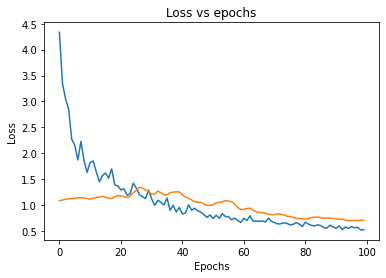

In [ ]:
import matplotlib.pyplot as plt
history.history
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Loss vs epochs')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.show()